# Práctica 6
@Author: Borja Gete & Fernán Ramos @Versión 1.0.0 @Date 04/05/2016

In [131]:
import networkx as nx # librería de análisis de redes
import numpy as np # librería de computación numérica
import matplotlib.pyplot as plt
import scipy.stats as sc
import math as math
#import plotly.plotly as py # Libreria para histogramas
%matplotlib inline

In [132]:
def crearLista(N):
    nodos=[]
    for n in range(0,N):
        nodos.append(n)
    return nodos

In [133]:
#función Gilbert O'Sullivan
def gilbert(N,p):
    red = nx.Graph()
    nodos=crearLista(N)
    for i in nodos:
        red.add_node(i)
        for j in nodos:
            if j != i:
                if np.random.rand(1) < p:
                    red.add_edge(i,j)
    return red

In [134]:
def obtenerGigante(red):
    componenteGigante=[Gc.number_of_nodes() for Gc in nx.connected_component_subgraphs(red)]
    componenteGigante=max(componenteGigante)
    return componenteGigante

In [190]:
def calcularVariacion(numero,N):
    #Definimos conjunto de valores
    valores=np.linspace(0,np.log(N),numero)
    
    lista=[]
    for i in range(0,len(valores)):
        #generamos la red y calculamos el tamaño del componente gigante
        pj=valores[i]/N
        lista.append(obtenerGigante(gilbert(N,pj))) 
        
    #representar graficamente
    plt.hist(lista,color="blue")
    plt.hist(valores,color="red")
    plt.show()

## 1 Modelo Gilbert
### 1.1 Implementar en una función de python el algoritmo de generación de redes aleatorias de Gilbert G(N,p) : “red de n nodos donde la probabilidad de que dos nodos cualesquiera tengan un vínculo es p”.
### 1.2 Para una red generada mediante el modelo anterior G(100,0.005) calcular los estadísticos:
#### -> Número de nodos, número de enlaces

In [184]:
red=gilbert(100,0.005)
print "Número de Nodos:", len(red.nodes())
print "Número de Enlaces:", len(red.edges())

Número de Nodos: 100
Número de Enlaces: 52


#### -> Grado máximo, mínimo y medio

In [185]:
print "Grado medio:",np.mean(red.degree().values())
print "Grado máximo:",np.max(red.degree().values())
print "Grado mínimo:",np.min(red.degree().values())

Grado medio: 1.04
Grado máximo: 7
Grado mínimo: 0


#### -> Clustering medio de los nodos

In [186]:
print "Clustering: %.9f" % nx.average_clustering(red)  

Clustering: 0.000000000


## 2 Distribución de grado
### 2.1 Represente la distribución de grado de distintas realizaciones del modelo G(100,p) para los siguientes valores de p={0.005,0.05,0.5}. ¿Qué distribución de probabilidad sigue la distribución de grado?

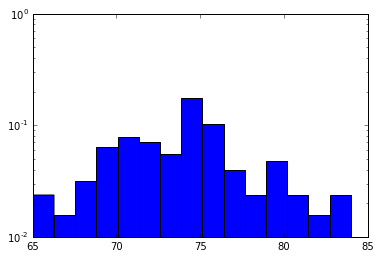

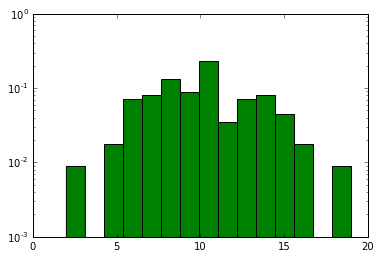

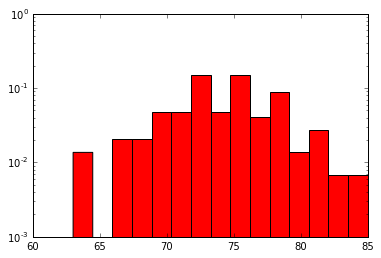

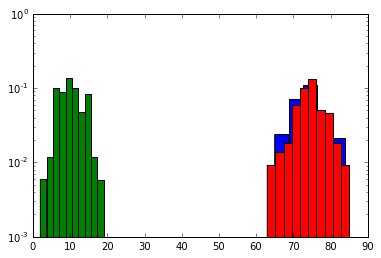

La distribución de probabilidad que sigue es binomial


In [170]:
[a,b,c]= gilbert(100,000.5),gilbert(100,0.05),gilbert(100,0.5)
plt.hist(nx.degree(c).values(),bins=15,log=True,normed=True,color="blue")
plt.show()
plt.hist(nx.degree(b).values(),bins=15,log=True,normed=True,color="green")
plt.show()
plt.hist(nx.degree(a).values(),bins=15,log=True,normed=True,color="red",)
plt.show()
plt.hist(nx.degree(c).values(),bins=5,log=True,normed=True,color="blue")
plt.hist(nx.degree(b).values(),bins=10,log=True,normed=True,color="green")
plt.hist(nx.degree(a).values(),bins=10,log=True,normed=True,color="red",)
plt.show()
print "La distribución de probabilidad que sigue es binomial"

## 3 Aparición del componente gigante
### 3.1 Calcule la variación de N G /N (tamaño del componente mayor N G dividido por el número de nodos N) cuando variamos el grado medio  k de una red G( 1000 ,p) y represéntelo gráficamente de forma semejante a la figura

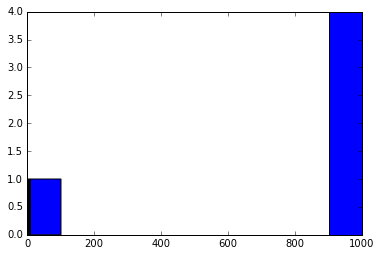

In [191]:
calcularVariacion(5,1000)